# 중구 '명동거리' - 일반의류 모델링

In [96]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 폰트 설정 방법 2
import matplotlib as plt
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [97]:
# 전처리 된 일반의류 데이터

df = pd.read_csv('./myungdong_cloth_after.csv', encoding = 'cp949')

In [98]:
# 결과 확인

df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,0,2015,1,CS300011,1.00,1.00,0.50,0.90,4,0.82,...,0.78,0.74,0.75,0.73,0.80,0.75,0.73,0.67,0.73,0.39
1,1,2015,2,CS300011,0.96,0.96,0.50,0.60,2,0.33,...,0.90,0.92,0.89,0.90,0.80,0.89,0.97,0.85,0.91,0.57
2,2,2015,3,CS300011,0.86,0.86,0.50,0.70,3,0.70,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67
3,3,2015,4,CS300011,0.84,0.84,0.50,0.70,2,0.33,...,0.70,0.76,0.71,0.69,0.87,0.69,0.66,0.74,0.69,0.42
4,4,2016,1,CS300011,0.75,0.75,0.50,0.70,3,0.64,...,0.64,0.60,0.57,0.63,0.69,0.62,0.57,0.55,0.61,0.42


In [99]:
# 결과 확인

df.shape

(22, 82)

In [100]:
# 결측치 확인

df.isnull().sum()

Unnamed: 0         0
기준_년_코드            0
기준_분기_코드           0
서비스_업종_코드          0
점포_수               0
                  ..
연령대_20_매출_건수       0
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
Length: 82, dtype: int64

In [101]:
# 전체 결측치 확인

all_null = df.isnull().sum()
all_null.sum()

0

In [102]:
# 모든 column 출력

df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율',
       '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매

In [106]:
# 불필요한 column 삭제

useless = ['Unnamed: 0', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_점포_수', '프랜차이즈_점포_수', 
           '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', 
           '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
           '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액','시간대_17~21_매출_금액', 
           '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', 
           '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', 
           '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', 
           '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
           '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
           '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
           '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

df_new = df.drop(useless, axis = 1)

In [107]:
# 결과 확인

df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,1,0.64,0.17,1.00,0.25,0.00,0.00,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,4,0.57,0.67,0.50,1.00,0.20,0.50,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,2,0.63,0.17,0.83,0.25,0.20,0.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,5,0.48,0.50,0.50,0.25,0.40,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,3,0.63,0.33,0.83,0.25,0.20,1.00,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


In [108]:
# dataframe 행 순서 조정

a = df_new.iloc[20]
df_new = df_new.drop(20)
df_new = df_new.append(a)
df_new = df_new.reset_index(drop = True)
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,1,0.64,0.17,1.00,0.25,0.00,0.00,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,4,0.57,0.67,0.50,1.00,0.20,0.50,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,2,0.63,0.17,0.83,0.25,0.20,0.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,5,0.48,0.50,0.50,0.25,0.40,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,3,0.63,0.33,0.83,0.25,0.20,1.00,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


## 2. 모델링 데이터 준비
### (1) 시계열 인풋데이터 만들기

In [109]:
def four_season_data_in(all_data_in,y_1,q_1,y_2,q_2,y_3,q_3,y_4,q_4):

    _test = pd.merge(all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_1,q_1)).drop(['기준_년_코드','기준_분기_코드'], axis=1),
                     all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_2,q_2)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('-4', '-3'))
    _test = pd.merge(_test,all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_3,q_3)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('', '-2'))
    _test = pd.merge(_test,all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_4,q_4)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('', '-1'))
    return _test

In [110]:
# 예측을 위한 인풋 데이터 생성

x_predict_2020_3 = four_season_data_in(df_new.drop('폐업_률', axis = 1),2019,3,2019,4,2020,1,2020,2)
x_predict_2020_3 = x_predict_2020_3.drop('서비스_업종_코드', axis = 1)
x_predict_2020_3

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_17~21_매출_비율-1,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1
0,0.26,1.00,0.00,0.75,0.60,1.00,0.25,0.25,0.00,0.33,...,0.83,0.00,0.50,0.46,0.00,0.00,0.67,0.80,1.00,0.86


### (2) 시계열 아웃풋데이터 만들기

In [111]:
def four_season_data_out(all_data_c,y_5,q_5):
    
    _test = pd.DataFrame(all_data_c.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_5,q_5))['폐업_률'])
    
    return _test

In [112]:
y_predict_2020_2 = four_season_data_out(df_new,2020,2)
y_predict_2020_2

,폐업_률
21,0


### (3) 시계열 데이터 합치기

In [113]:
list_season = []
for i in range(2015,2020):
    
    for j in range(1,5):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)
        
for i in range(2020,2021):
    
    for j in range(1,3):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)        

print(list_season)

[[2015, 1], [2015, 2], [2015, 3], [2015, 4], [2016, 1], [2016, 2], [2016, 3], [2016, 4], [2017, 1], [2017, 2], [2017, 3], [2017, 4], [2018, 1], [2018, 2], [2018, 3], [2018, 4], [2019, 1], [2019, 2], [2019, 3], [2019, 4], [2020, 1], [2020, 2]]


In [114]:
for i in range(0,18):
    # print(i)
    globals()["x_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_in(df_new.drop('폐업_률', axis = 1),
                                                                                                                  list_season[i][0],list_season[i][1],
                                                                                                                  list_season[i+1][0],list_season[i+1][1],
                                                                                                                  list_season[i+2][0],list_season[i+2][1],
                                                                                                                  list_season[i+3][0],list_season[i+3][1]
                                                                                                              )
    globals()["y_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_out(df_new,
                                                                                                                 list_season[i+4][0],list_season[i+4][1])

In [115]:
# df 를 vertically concat 하기 위해 append 함

x_in = pd.DataFrame(columns = x_predict_2020_2.columns)
x_out = pd.DataFrame(columns = y_predict_2020_2.columns)
for i in range(0, 18):
    x_in = x_in.append(globals()["x_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
    x_out = x_out.append(globals()["y_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
x_in = x_in.drop(['서비스_업종_코드'], axis=1)
x_in = x_in.reset_index(drop=True, inplace=False)
x_in

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_17~21_매출_비율-1,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1
0,1.00,0.17,0.83,0.00,0.20,1.00,0.00,1.00,0.40,0.67,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
1,0.96,0.00,1.00,0.25,0.40,0.50,0.25,0.25,1.00,0.33,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
2,0.98,0.83,0.17,0.25,0.40,1.00,0.75,0.25,0.20,0.33,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
3,1.00,0.33,0.67,0.25,0.20,0.50,0.75,0.50,0.40,0.67,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
4,0.80,0.17,0.83,0.25,0.40,0.50,0.25,0.25,0.60,0.67,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
5,0.64,0.17,1.00,0.25,0.00,0.00,0.50,0.50,0.60,1.00,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
6,0.57,0.67,0.50,1.00,0.20,0.50,0.25,0.75,0.20,0.67,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86
7,0.63,0.17,0.83,0.25,0.20,0.00,1.00,0.00,0.60,0.67,...,0.50,1.00,0.42,0.54,0.50,0.62,0.33,0.40,0.62,0.57
8,0.48,0.50,0.50,0.25,0.40,0.50,0.50,0.50,0.00,1.00,...,0.50,0.86,0.25,0.69,0.75,0.69,0.17,0.60,0.38,0.57
9,0.63,0.33,0.83,0.25,0.20,1.00,0.50,0.25,0.40,1.00,...,0.67,0.71,0.33,0.62,0.75,1.00,0.00,0.00,0.38,0.57


In [116]:
x_out = x_out.reset_index(drop = True)
x_out

,폐업_률
0,3
1,1
2,4
3,2
4,5
5,3
6,2
7,2
8,3
9,1


In [117]:
x_out['폐업_률'] = pd.to_numeric(x_out['폐업_률'])
x_out

,폐업_률
0,3
1,1
2,4
3,2
4,5
5,3
6,2
7,2
8,3
9,1


In [118]:
x = pd.concat([x_in,x_out], axis=1)
x

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1,폐업_률
0,1.00,0.17,0.83,0.00,0.20,1.00,0.00,1.00,0.40,0.67,...,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14,3
1,0.96,0.00,1.00,0.25,0.40,0.50,0.25,0.25,1.00,0.33,...,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43,1
2,0.98,0.83,0.17,0.25,0.40,1.00,0.75,0.25,0.20,0.33,...,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43,4
3,1.00,0.33,0.67,0.25,0.20,0.50,0.75,0.50,0.40,0.67,...,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71,2
4,0.80,0.17,0.83,0.25,0.40,0.50,0.25,0.25,0.60,0.67,...,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29,5
5,0.64,0.17,1.00,0.25,0.00,0.00,0.50,0.50,0.60,1.00,...,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71,3
6,0.57,0.67,0.50,1.00,0.20,0.50,0.25,0.75,0.20,0.67,...,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86,2
7,0.63,0.17,0.83,0.25,0.20,0.00,1.00,0.00,0.60,0.67,...,1.00,0.42,0.54,0.50,0.62,0.33,0.40,0.62,0.57,2
8,0.48,0.50,0.50,0.25,0.40,0.50,0.50,0.50,0.00,1.00,...,0.86,0.25,0.69,0.75,0.69,0.17,0.60,0.38,0.57,3
9,0.63,0.33,0.83,0.25,0.20,1.00,0.50,0.25,0.40,1.00,...,0.71,0.33,0.62,0.75,1.00,0.00,0.00,0.38,0.57,1


## 3. 모델링 - XGBoost
### (1) 모델링

In [119]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장
from sklearn.metrics import accuracy_score

# train, test 데이터 분할

X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [120]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=1500, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:2.17742
[1]	validation_0-rmse:2.17541
[2]	validation_0-rmse:2.17390
[3]	validation_0-rmse:2.17248
[4]	validation_0-rmse:2.17044
[5]	validation_0-rmse:2.16902
[6]	validation_0-rmse:2.16720
[7]	validation_0-rmse:2.16517
[8]	validation_0-rmse:2.16357
[9]	validation_0-rmse:2.16192
[10]	validation_0-rmse:2.16027
[11]	validation_0-rmse:2.15826
[12]	validation_0-rmse:2.15625
[13]	validation_0-rmse:2.15422
[14]	validation_0-rmse:2.15273
[15]	validation_0-rmse:2.15120
[16]	validation_0-rmse:2.14919
[17]	validation_0-rmse:2.14719
[18]	validation_0-rmse:2.14577
[19]	validation_0-rmse:2.14436
[20]	validation_0-rmse:2.14284
[21]	validation_0-rmse:2.14127
[22]	validation_0-rmse:2.13925
[23]	validation_0-rmse:2.13796
[24]	validation_0-rmse:2.13617
[25]	validation_0-rmse:2.13456
[26]	validation_0-rmse:2.13307
[27]	validation_0-rmse:2.13108
[28]	validation_0-rmse:2.12929
[29]	validation_0-rmse:2.12740
[30]	validation_0-rmse:2.12629
[31]	validation_0-rmse:2.12431
[32]	validation_0-

[260]	validation_0-rmse:1.78994
[261]	validation_0-rmse:1.78909
[262]	validation_0-rmse:1.78808
[263]	validation_0-rmse:1.78651
[264]	validation_0-rmse:1.78496
[265]	validation_0-rmse:1.78340
[266]	validation_0-rmse:1.78257
[267]	validation_0-rmse:1.78157
[268]	validation_0-rmse:1.78042
[269]	validation_0-rmse:1.77912
[270]	validation_0-rmse:1.77757
[271]	validation_0-rmse:1.77644
[272]	validation_0-rmse:1.77489
[273]	validation_0-rmse:1.77334
[274]	validation_0-rmse:1.77179
[275]	validation_0-rmse:1.77094
[276]	validation_0-rmse:1.76941
[277]	validation_0-rmse:1.76852
[278]	validation_0-rmse:1.76699
[279]	validation_0-rmse:1.76602
[280]	validation_0-rmse:1.76490
[281]	validation_0-rmse:1.76394
[282]	validation_0-rmse:1.76240
[283]	validation_0-rmse:1.76130
[284]	validation_0-rmse:1.76034
[285]	validation_0-rmse:1.75882
[286]	validation_0-rmse:1.75729
[287]	validation_0-rmse:1.75578
[288]	validation_0-rmse:1.75426
[289]	validation_0-rmse:1.75274
[290]	validation_0-rmse:1.75185
[291]	va

[517]	validation_0-rmse:1.49785
[518]	validation_0-rmse:1.49672
[519]	validation_0-rmse:1.49558
[520]	validation_0-rmse:1.49474
[521]	validation_0-rmse:1.49361
[522]	validation_0-rmse:1.49284
[523]	validation_0-rmse:1.49220
[524]	validation_0-rmse:1.49107
[525]	validation_0-rmse:1.49037
[526]	validation_0-rmse:1.48960
[527]	validation_0-rmse:1.48847
[528]	validation_0-rmse:1.48766
[529]	validation_0-rmse:1.48655
[530]	validation_0-rmse:1.48538
[531]	validation_0-rmse:1.48428
[532]	validation_0-rmse:1.48341
[533]	validation_0-rmse:1.48230
[534]	validation_0-rmse:1.48121
[535]	validation_0-rmse:1.48009
[536]	validation_0-rmse:1.47898
[537]	validation_0-rmse:1.47788
[538]	validation_0-rmse:1.47694
[539]	validation_0-rmse:1.47651
[540]	validation_0-rmse:1.47542
[541]	validation_0-rmse:1.47432
[542]	validation_0-rmse:1.47322
[543]	validation_0-rmse:1.47242
[544]	validation_0-rmse:1.47133
[545]	validation_0-rmse:1.47033
[546]	validation_0-rmse:1.46949
[547]	validation_0-rmse:1.46868
[548]	va

[774]	validation_0-rmse:1.29209
[775]	validation_0-rmse:1.29136
[776]	validation_0-rmse:1.29081
[777]	validation_0-rmse:1.29008
[778]	validation_0-rmse:1.28957
[779]	validation_0-rmse:1.28885
[780]	validation_0-rmse:1.28832
[781]	validation_0-rmse:1.28759
[782]	validation_0-rmse:1.28703
[783]	validation_0-rmse:1.28642
[784]	validation_0-rmse:1.28587
[785]	validation_0-rmse:1.28511
[786]	validation_0-rmse:1.28445
[787]	validation_0-rmse:1.28373
[788]	validation_0-rmse:1.28317
[789]	validation_0-rmse:1.28280
[790]	validation_0-rmse:1.28226
[791]	validation_0-rmse:1.28195
[792]	validation_0-rmse:1.28123
[793]	validation_0-rmse:1.28048
[794]	validation_0-rmse:1.27984
[795]	validation_0-rmse:1.27914
[796]	validation_0-rmse:1.27845
[797]	validation_0-rmse:1.27774
[798]	validation_0-rmse:1.27709
[799]	validation_0-rmse:1.27635
[800]	validation_0-rmse:1.27579
[801]	validation_0-rmse:1.27485
[802]	validation_0-rmse:1.27431
[803]	validation_0-rmse:1.27375
[804]	validation_0-rmse:1.27320
[805]	va

[1030]	validation_0-rmse:1.17735
[1031]	validation_0-rmse:1.17708
[1032]	validation_0-rmse:1.17683
[1033]	validation_0-rmse:1.17642
[1034]	validation_0-rmse:1.17618
[1035]	validation_0-rmse:1.17578
[1036]	validation_0-rmse:1.17535
[1037]	validation_0-rmse:1.17512
[1038]	validation_0-rmse:1.17475
[1039]	validation_0-rmse:1.17452
[1040]	validation_0-rmse:1.17430
[1041]	validation_0-rmse:1.17417
[1042]	validation_0-rmse:1.17392
[1043]	validation_0-rmse:1.17369
[1044]	validation_0-rmse:1.17328
[1045]	validation_0-rmse:1.17308
[1046]	validation_0-rmse:1.17272
[1047]	validation_0-rmse:1.17283
[1048]	validation_0-rmse:1.17254
[1049]	validation_0-rmse:1.17233
[1050]	validation_0-rmse:1.17210
[1051]	validation_0-rmse:1.17189
[1052]	validation_0-rmse:1.17175
[1053]	validation_0-rmse:1.17163
[1054]	validation_0-rmse:1.17143
[1055]	validation_0-rmse:1.17122
[1056]	validation_0-rmse:1.17101
[1057]	validation_0-rmse:1.17066
[1058]	validation_0-rmse:1.17029
[1059]	validation_0-rmse:1.17008
[1060]	val

[1279]	validation_0-rmse:1.13524
[1280]	validation_0-rmse:1.13508
[1281]	validation_0-rmse:1.13507
[1282]	validation_0-rmse:1.13506
[1283]	validation_0-rmse:1.13492
[1284]	validation_0-rmse:1.13479
[1285]	validation_0-rmse:1.13465
[1286]	validation_0-rmse:1.13428
[1287]	validation_0-rmse:1.13429
[1288]	validation_0-rmse:1.13428
[1289]	validation_0-rmse:1.13416
[1290]	validation_0-rmse:1.13403
[1291]	validation_0-rmse:1.13403
[1292]	validation_0-rmse:1.13389
[1293]	validation_0-rmse:1.13354
[1294]	validation_0-rmse:1.13330
[1295]	validation_0-rmse:1.13332
[1296]	validation_0-rmse:1.13316
[1297]	validation_0-rmse:1.13316
[1298]	validation_0-rmse:1.13316
[1299]	validation_0-rmse:1.13314
[1300]	validation_0-rmse:1.13303
[1301]	validation_0-rmse:1.13304
[1302]	validation_0-rmse:1.13294
[1303]	validation_0-rmse:1.13309
[1304]	validation_0-rmse:1.13310
[1305]	validation_0-rmse:1.13316
[1306]	validation_0-rmse:1.13317
[1307]	validation_0-rmse:1.13329
[1308]	validation_0-rmse:1.13331
[1309]	val

### (2) 모델 성능 시각화

In [127]:
# 연도, 분기 추출

year = list(df_new['기준_년_코드'])
month = list(df_new['기준_분기_코드'])

# (연도, 분기) list 생성

year_month = [i for i in zip(year,month)]
year_month

# '연도_분기' list 생성
# 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일

y_m = []
for i in range(len(year_month)):
    month = ''
    if int(year_month[i][1]) == 1:
        month = 3
    elif int(year_month[i][1]) == 2:
        month = 6
    elif int(year_month[i][1]) == 3:
        month = 9
    else :
        month = 12
    a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
    y_m.append(a)
    
# 새로운 column 추가
df_date = df_new.copy()
df_date['Date'] = y_m
df_date['Date'] = df_date['Date'].astype('datetime64[ns]')

date_series = df_date.loc[[i for i in range(4,22)],'Date']
len(date_series)

18

Text(0.5, 0, '연도')

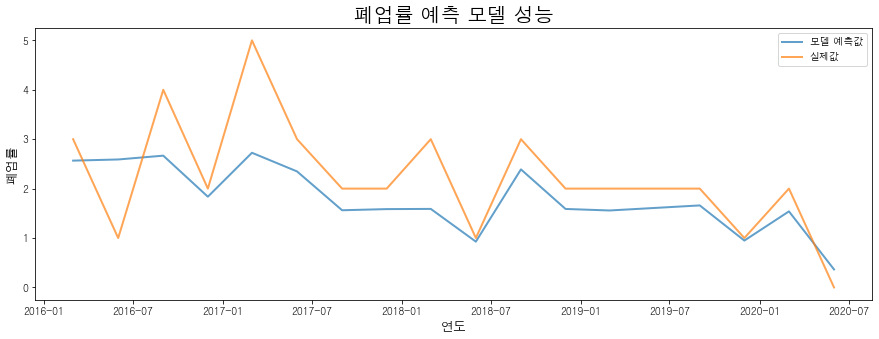

In [128]:
# 모델 성능 시각화
import seaborn as sns

# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
x_out_list = []
for i in range(len(x_out)):
    n = x_out.values[i][0]
    x_out_list.append(n)
fig, ax = plt.pyplot.subplots(figsize=(15,5))
sns.lineplot(x = date_series, y = model.predict(x_in),alpha = 0.7,linewidth = 2, ax = ax, label = '모델 예측값')
sns.lineplot(x = date_series, y = x_out_list, alpha = 0.7,linewidth = 2, ax = ax, label = '실제값')
ax.set_title('폐업률 예측 모델 성능', size = 20)
ax.set_ylabel('폐업률', size = 13)
ax.set_xlabel('연도', size = 13)

In [129]:
# 2020-3 명동거리 '일반의류' 폐업률 예측

model.predict(x_predict_2020_3)

array([1.2204394], dtype=float32)

### (3) Feature Importance

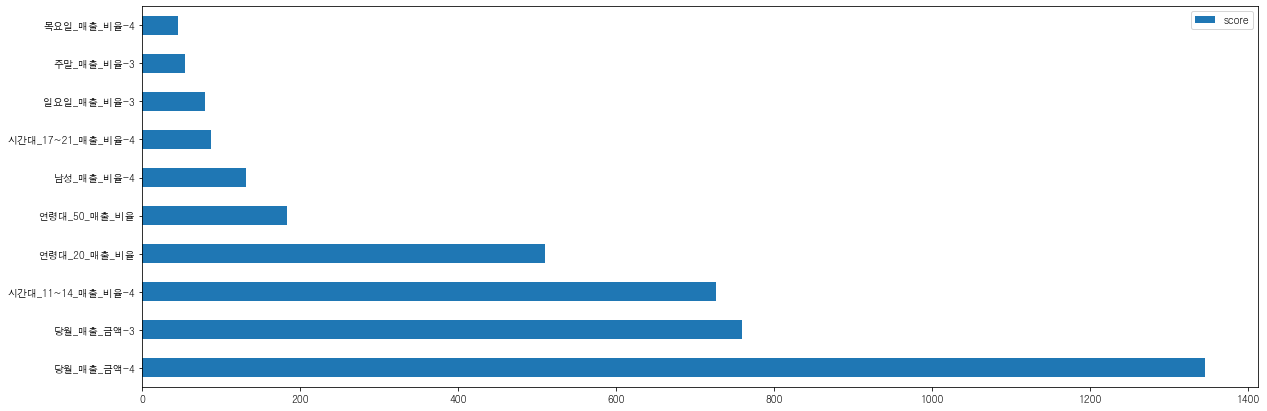

In [130]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')

## 4. 생존율 - 성별
### (1) 전처리

In [131]:
df_new.head()

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43


In [132]:
df_new.columns

Index(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '폐업_률', '당월_매출_금액', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

In [134]:
df_new = df[['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '남성_매출_비율', '여성_매출_비율', '폐업_률']]
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,남성_매출_비율,여성_매출_비율,폐업_률
0,2015,1,CS300011,0.75,0.23,4
1,2015,2,CS300011,0.67,0.31,2
2,2015,3,CS300011,0.92,0.08,3
3,2015,4,CS300011,1.00,0.00,2
4,2016,1,CS300011,0.75,0.23,3
5,2016,2,CS300011,0.67,0.31,1
6,2016,3,CS300011,0.25,0.69,4
7,2016,4,CS300011,0.33,0.62,2
8,2017,1,CS300011,0.33,0.62,5
9,2017,2,CS300011,0.33,0.62,3


In [135]:
# dataframe 행 순서 조정

a = df_new.iloc[20]
df_new = df_new.drop(20)
df_new = df_new.append(a)
df_new = df_new.reset_index(drop = True)
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,남성_매출_비율,여성_매출_비율,폐업_률
0,2015,1,CS300011,0.75,0.23,4
1,2015,2,CS300011,0.67,0.31,2
2,2015,3,CS300011,0.92,0.08,3
3,2015,4,CS300011,1.00,0.00,2
4,2016,1,CS300011,0.75,0.23,3
5,2016,2,CS300011,0.67,0.31,1
6,2016,3,CS300011,0.25,0.69,4
7,2016,4,CS300011,0.33,0.62,2
8,2017,1,CS300011,0.33,0.62,5
9,2017,2,CS300011,0.33,0.62,3


In [136]:
y = df_new[['기준_년_코드', '기준_분기_코드', '폐업_률']]
y

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,4
1,2015,2,2
2,2015,3,3
3,2015,4,2
4,2016,1,3
5,2016,2,1
6,2016,3,4
7,2016,4,2
8,2017,1,5
9,2017,2,3


In [138]:
y = y.drop(0).reset_index(drop = True)

y_new = pd.DataFrame(columns = y.columns)

for i in range(len(y)):
    row = y.iloc[i]
    if row['기준_분기_코드'] != 1:
        row['기준_분기_코드'] -= 1
        y_new = y_new.append(row)
    else:
        row['기준_년_코드'] -= 1
        row['기준_분기_코드'] = 4
        y_new = y_new.append(row)
        
y_new

In [140]:
x_predict = pd.DataFrame(columns = df_new.columns)
x_predict = x_predict.append(df_new.iloc[21,:])
x_predict = x_predict.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '폐업_률'], axis = 1)

In [141]:
x_predict

,남성_매출_비율,여성_매출_비율
21,0.50,0.46


In [142]:
x = df_new.drop('폐업_률', axis = 1).drop(21).reset_index(drop = True)
x

,기준_년_코드,기준_분기_코드,서비스_업종_코드,남성_매출_비율,여성_매출_비율
0,2015,1,CS300011,0.75,0.23
1,2015,2,CS300011,0.67,0.31
2,2015,3,CS300011,0.92,0.08
3,2015,4,CS300011,1.00,0.00
4,2016,1,CS300011,0.75,0.23
5,2016,2,CS300011,0.67,0.31
6,2016,3,CS300011,0.25,0.69
7,2016,4,CS300011,0.33,0.62
8,2017,1,CS300011,0.33,0.62
9,2017,2,CS300011,0.33,0.62


In [143]:
xy_train = pd.merge(x, y_new, how = 'left', on = ['기준_년_코드', '기준_분기_코드'])

In [144]:
xy_train

,기준_년_코드,기준_분기_코드,서비스_업종_코드,남성_매출_비율,여성_매출_비율,폐업_률
0,2015,1,CS300011,0.75,0.23,2
1,2015,2,CS300011,0.67,0.31,3
2,2015,3,CS300011,0.92,0.08,2
3,2015,4,CS300011,1.00,0.00,3
4,2016,1,CS300011,0.75,0.23,1
5,2016,2,CS300011,0.67,0.31,4
6,2016,3,CS300011,0.25,0.69,2
7,2016,4,CS300011,0.33,0.62,5
8,2017,1,CS300011,0.33,0.62,3
9,2017,2,CS300011,0.33,0.62,2


In [145]:
xy_train_new = xy_train.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드'], axis = 1)

In [146]:
xy_train_new

,남성_매출_비율,여성_매출_비율,폐업_률
0,0.75,0.23,2
1,0.67,0.31,3
2,0.92,0.08,2
3,1.00,0.00,3
4,0.75,0.23,1
5,0.67,0.31,4
6,0.25,0.69,2
7,0.33,0.62,5
8,0.33,0.62,3
9,0.33,0.62,2


### (2) 모델링

In [147]:
start = time.time()  # 시작 시간 저장

x_in = xy_train_new.drop('폐업_률', axis = 1)
x_out = xy_train_new['폐업_률']
total = 100
x_out = total - x_out

# train, test 데이터 
X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [148]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=12000, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:97.01154
[1]	validation_0-rmse:96.92170
[2]	validation_0-rmse:96.83066
[3]	validation_0-rmse:96.74098
[4]	validation_0-rmse:96.65093
[5]	validation_0-rmse:96.56246
[6]	validation_0-rmse:96.47311
[7]	validation_0-rmse:96.38284
[8]	validation_0-rmse:96.29359
[9]	validation_0-rmse:96.20495
[10]	validation_0-rmse:96.11492
[11]	validation_0-rmse:96.02653
[12]	validation_0-rmse:95.93660
[13]	validation_0-rmse:95.84847
[14]	validation_0-rmse:95.75854
[15]	validation_0-rmse:95.66823
[16]	validation_0-rmse:95.58283
[17]	validation_0-rmse:95.49655
[18]	validation_0-rmse:95.40865
[19]	validation_0-rmse:95.32091
[20]	validation_0-rmse:95.23270
[21]	validation_0-rmse:95.14324
[22]	validation_0-rmse:95.05591
[23]	validation_0-rmse:94.96819
[24]	validation_0-rmse:94.87985
[25]	validation_0-rmse:94.79242
[26]	validation_0-rmse:94.70358
[27]	validation_0-rmse:94.61548
[28]	validation_0-rmse:94.53017
[29]	validation_0-rmse:94.44231
[30]	validation_0-rmse:94.35460
[31]	validation_0-

[252]	validation_0-rmse:76.85886
[253]	validation_0-rmse:76.78932
[254]	validation_0-rmse:76.71748
[255]	validation_0-rmse:76.64564
[256]	validation_0-rmse:76.57502
[257]	validation_0-rmse:76.50504
[258]	validation_0-rmse:76.43540
[259]	validation_0-rmse:76.36413
[260]	validation_0-rmse:76.29343
[261]	validation_0-rmse:76.22243
[262]	validation_0-rmse:76.15171
[263]	validation_0-rmse:76.08076
[264]	validation_0-rmse:76.00959
[265]	validation_0-rmse:75.93988
[266]	validation_0-rmse:75.86871
[267]	validation_0-rmse:75.79838
[268]	validation_0-rmse:75.72806
[269]	validation_0-rmse:75.65817
[270]	validation_0-rmse:75.58732
[271]	validation_0-rmse:75.51691
[272]	validation_0-rmse:75.44849
[273]	validation_0-rmse:75.37999
[274]	validation_0-rmse:75.30907
[275]	validation_0-rmse:75.23862
[276]	validation_0-rmse:75.16928
[277]	validation_0-rmse:75.09946
[278]	validation_0-rmse:75.02992
[279]	validation_0-rmse:74.95965
[280]	validation_0-rmse:74.89099
[281]	validation_0-rmse:74.82353
[282]	vali

[501]	validation_0-rmse:61.05129
[502]	validation_0-rmse:60.99472
[503]	validation_0-rmse:60.93742
[504]	validation_0-rmse:60.88211
[505]	validation_0-rmse:60.82659
[506]	validation_0-rmse:60.76965
[507]	validation_0-rmse:60.71307
[508]	validation_0-rmse:60.65697
[509]	validation_0-rmse:60.60076
[510]	validation_0-rmse:60.54446
[511]	validation_0-rmse:60.48877
[512]	validation_0-rmse:60.43295
[513]	validation_0-rmse:60.37611
[514]	validation_0-rmse:60.32040
[515]	validation_0-rmse:60.26416
[516]	validation_0-rmse:60.20748
[517]	validation_0-rmse:60.15098
[518]	validation_0-rmse:60.09467
[519]	validation_0-rmse:60.03978
[520]	validation_0-rmse:59.98454
[521]	validation_0-rmse:59.92956
[522]	validation_0-rmse:59.87347
[523]	validation_0-rmse:59.81783
[524]	validation_0-rmse:59.76241
[525]	validation_0-rmse:59.70754
[526]	validation_0-rmse:59.65171
[527]	validation_0-rmse:59.59721
[528]	validation_0-rmse:59.54221
[529]	validation_0-rmse:59.48681
[530]	validation_0-rmse:59.43149
[531]	vali

[750]	validation_0-rmse:48.48498
[751]	validation_0-rmse:48.43928
[752]	validation_0-rmse:48.39390
[753]	validation_0-rmse:48.34925
[754]	validation_0-rmse:48.30419
[755]	validation_0-rmse:48.25940
[756]	validation_0-rmse:48.21488
[757]	validation_0-rmse:48.16981
[758]	validation_0-rmse:48.12504
[759]	validation_0-rmse:48.08028
[760]	validation_0-rmse:48.03530
[761]	validation_0-rmse:47.99115
[762]	validation_0-rmse:47.94780
[763]	validation_0-rmse:47.90295
[764]	validation_0-rmse:47.85876
[765]	validation_0-rmse:47.81385
[766]	validation_0-rmse:47.76958
[767]	validation_0-rmse:47.72462
[768]	validation_0-rmse:47.67964
[769]	validation_0-rmse:47.63573
[770]	validation_0-rmse:47.59187
[771]	validation_0-rmse:47.54715
[772]	validation_0-rmse:47.50264
[773]	validation_0-rmse:47.45882
[774]	validation_0-rmse:47.41479
[775]	validation_0-rmse:47.37170
[776]	validation_0-rmse:47.32845
[777]	validation_0-rmse:47.28440
[778]	validation_0-rmse:47.24102
[779]	validation_0-rmse:47.19721
[780]	vali

[999]	validation_0-rmse:38.48831
[1000]	validation_0-rmse:38.45226
[1001]	validation_0-rmse:38.41627
[1002]	validation_0-rmse:38.38095
[1003]	validation_0-rmse:38.34539
[1004]	validation_0-rmse:38.31118
[1005]	validation_0-rmse:38.27518
[1006]	validation_0-rmse:38.23980
[1007]	validation_0-rmse:38.20523
[1008]	validation_0-rmse:38.17088
[1009]	validation_0-rmse:38.13498
[1010]	validation_0-rmse:38.09942
[1011]	validation_0-rmse:38.06488
[1012]	validation_0-rmse:38.02954
[1013]	validation_0-rmse:37.99448
[1014]	validation_0-rmse:37.95885
[1015]	validation_0-rmse:37.92319
[1016]	validation_0-rmse:37.88756
[1017]	validation_0-rmse:37.85261
[1018]	validation_0-rmse:37.81746
[1019]	validation_0-rmse:37.78234
[1020]	validation_0-rmse:37.74689
[1021]	validation_0-rmse:37.71162
[1022]	validation_0-rmse:37.67630
[1023]	validation_0-rmse:37.64166
[1024]	validation_0-rmse:37.60735
[1025]	validation_0-rmse:37.57191
[1026]	validation_0-rmse:37.53753
[1027]	validation_0-rmse:37.50326
[1028]	validati

[1240]	validation_0-rmse:30.78036
[1241]	validation_0-rmse:30.75230
[1242]	validation_0-rmse:30.72334
[1243]	validation_0-rmse:30.69444
[1244]	validation_0-rmse:30.66618
[1245]	validation_0-rmse:30.63879
[1246]	validation_0-rmse:30.61012
[1247]	validation_0-rmse:30.58211
[1248]	validation_0-rmse:30.55397
[1249]	validation_0-rmse:30.52630
[1250]	validation_0-rmse:30.49812
[1251]	validation_0-rmse:30.47032
[1252]	validation_0-rmse:30.44211
[1253]	validation_0-rmse:30.41391
[1254]	validation_0-rmse:30.38559
[1255]	validation_0-rmse:30.35726
[1256]	validation_0-rmse:30.32941
[1257]	validation_0-rmse:30.30120
[1258]	validation_0-rmse:30.27366
[1259]	validation_0-rmse:30.24572
[1260]	validation_0-rmse:30.21767
[1261]	validation_0-rmse:30.18939
[1262]	validation_0-rmse:30.16254
[1263]	validation_0-rmse:30.13449
[1264]	validation_0-rmse:30.10758
[1265]	validation_0-rmse:30.07971
[1266]	validation_0-rmse:30.05166
[1267]	validation_0-rmse:30.02466
[1268]	validation_0-rmse:29.99739
[1269]	validat

[1481]	validation_0-rmse:24.61273
[1482]	validation_0-rmse:24.58981
[1483]	validation_0-rmse:24.56682
[1484]	validation_0-rmse:24.54379
[1485]	validation_0-rmse:24.52078
[1486]	validation_0-rmse:24.49764
[1487]	validation_0-rmse:24.47491
[1488]	validation_0-rmse:24.45184
[1489]	validation_0-rmse:24.42892
[1490]	validation_0-rmse:24.40674
[1491]	validation_0-rmse:24.38526
[1492]	validation_0-rmse:24.36296
[1493]	validation_0-rmse:24.34092
[1494]	validation_0-rmse:24.31831
[1495]	validation_0-rmse:24.29566
[1496]	validation_0-rmse:24.27358
[1497]	validation_0-rmse:24.25075
[1498]	validation_0-rmse:24.22817
[1499]	validation_0-rmse:24.20538
[1500]	validation_0-rmse:24.18334
[1501]	validation_0-rmse:24.16107
[1502]	validation_0-rmse:24.13889
[1503]	validation_0-rmse:24.11660
[1504]	validation_0-rmse:24.09413
[1505]	validation_0-rmse:24.07191
[1506]	validation_0-rmse:24.05028
[1507]	validation_0-rmse:24.02795
[1508]	validation_0-rmse:24.00557
[1509]	validation_0-rmse:23.98280
[1510]	validat

[1722]	validation_0-rmse:19.66708
[1723]	validation_0-rmse:19.64850
[1724]	validation_0-rmse:19.63031
[1725]	validation_0-rmse:19.61179
[1726]	validation_0-rmse:19.59322
[1727]	validation_0-rmse:19.57490
[1728]	validation_0-rmse:19.55678
[1729]	validation_0-rmse:19.53833
[1730]	validation_0-rmse:19.52023
[1731]	validation_0-rmse:19.50204
[1732]	validation_0-rmse:19.48359
[1733]	validation_0-rmse:19.46563
[1734]	validation_0-rmse:19.44731
[1735]	validation_0-rmse:19.42975
[1736]	validation_0-rmse:19.41153
[1737]	validation_0-rmse:19.39371
[1738]	validation_0-rmse:19.37558
[1739]	validation_0-rmse:19.35738
[1740]	validation_0-rmse:19.33900
[1741]	validation_0-rmse:19.32063
[1742]	validation_0-rmse:19.30240
[1743]	validation_0-rmse:19.28468
[1744]	validation_0-rmse:19.26675
[1745]	validation_0-rmse:19.24892
[1746]	validation_0-rmse:19.23064
[1747]	validation_0-rmse:19.21261
[1748]	validation_0-rmse:19.19481
[1749]	validation_0-rmse:19.17691
[1750]	validation_0-rmse:19.15885
[1751]	validat

[1963]	validation_0-rmse:15.70606
[1964]	validation_0-rmse:15.69126
[1965]	validation_0-rmse:15.67665
[1966]	validation_0-rmse:15.66173
[1967]	validation_0-rmse:15.64683
[1968]	validation_0-rmse:15.63235
[1969]	validation_0-rmse:15.61797
[1970]	validation_0-rmse:15.60343
[1971]	validation_0-rmse:15.58867
[1972]	validation_0-rmse:15.57437
[1973]	validation_0-rmse:15.55947
[1974]	validation_0-rmse:15.54494
[1975]	validation_0-rmse:15.53054
[1976]	validation_0-rmse:15.51598
[1977]	validation_0-rmse:15.50150
[1978]	validation_0-rmse:15.48691
[1979]	validation_0-rmse:15.47238
[1980]	validation_0-rmse:15.45790
[1981]	validation_0-rmse:15.44319
[1982]	validation_0-rmse:15.42889
[1983]	validation_0-rmse:15.41431
[1984]	validation_0-rmse:15.39943
[1985]	validation_0-rmse:15.38509
[1986]	validation_0-rmse:15.37069
[1987]	validation_0-rmse:15.35620
[1988]	validation_0-rmse:15.34156
[1989]	validation_0-rmse:15.32689
[1990]	validation_0-rmse:15.31235
[1991]	validation_0-rmse:15.29813
[1992]	validat

[2204]	validation_0-rmse:12.53900
[2205]	validation_0-rmse:12.52708
[2206]	validation_0-rmse:12.51523
[2207]	validation_0-rmse:12.50353
[2208]	validation_0-rmse:12.49171
[2209]	validation_0-rmse:12.47990
[2210]	validation_0-rmse:12.46788
[2211]	validation_0-rmse:12.45616
[2212]	validation_0-rmse:12.44439
[2213]	validation_0-rmse:12.43255
[2214]	validation_0-rmse:12.42065
[2215]	validation_0-rmse:12.40898
[2216]	validation_0-rmse:12.39733
[2217]	validation_0-rmse:12.38561
[2218]	validation_0-rmse:12.37405
[2219]	validation_0-rmse:12.36221
[2220]	validation_0-rmse:12.35038
[2221]	validation_0-rmse:12.33917
[2222]	validation_0-rmse:12.32758
[2223]	validation_0-rmse:12.31592
[2224]	validation_0-rmse:12.30447
[2225]	validation_0-rmse:12.29268
[2226]	validation_0-rmse:12.28114
[2227]	validation_0-rmse:12.26938
[2228]	validation_0-rmse:12.25763
[2229]	validation_0-rmse:12.24619
[2230]	validation_0-rmse:12.23470
[2231]	validation_0-rmse:12.22299
[2232]	validation_0-rmse:12.21162
[2233]	validat

[2445]	validation_0-rmse:10.00164
[2446]	validation_0-rmse:9.99223
[2447]	validation_0-rmse:9.98322
[2448]	validation_0-rmse:9.97406
[2449]	validation_0-rmse:9.96467
[2450]	validation_0-rmse:9.95520
[2451]	validation_0-rmse:9.94608
[2452]	validation_0-rmse:9.93658
[2453]	validation_0-rmse:9.92714
[2454]	validation_0-rmse:9.91765
[2455]	validation_0-rmse:9.90830
[2456]	validation_0-rmse:9.89904
[2457]	validation_0-rmse:9.88996
[2458]	validation_0-rmse:9.88064
[2459]	validation_0-rmse:9.87100
[2460]	validation_0-rmse:9.86152
[2461]	validation_0-rmse:9.85223
[2462]	validation_0-rmse:9.84279
[2463]	validation_0-rmse:9.83345
[2464]	validation_0-rmse:9.82443
[2465]	validation_0-rmse:9.81524
[2466]	validation_0-rmse:9.80607
[2467]	validation_0-rmse:9.79683
[2468]	validation_0-rmse:9.78775
[2469]	validation_0-rmse:9.77871
[2470]	validation_0-rmse:9.76935
[2471]	validation_0-rmse:9.76014
[2472]	validation_0-rmse:9.75095
[2473]	validation_0-rmse:9.74193
[2474]	validation_0-rmse:9.73247
[2475]	va

[2694]	validation_0-rmse:7.91002
[2695]	validation_0-rmse:7.90245
[2696]	validation_0-rmse:7.89489
[2697]	validation_0-rmse:7.88714
[2698]	validation_0-rmse:7.87963
[2699]	validation_0-rmse:7.87216
[2700]	validation_0-rmse:7.86472
[2701]	validation_0-rmse:7.85714
[2702]	validation_0-rmse:7.85001
[2703]	validation_0-rmse:7.84272
[2704]	validation_0-rmse:7.83519
[2705]	validation_0-rmse:7.82762
[2706]	validation_0-rmse:7.82035
[2707]	validation_0-rmse:7.81309
[2708]	validation_0-rmse:7.80585
[2709]	validation_0-rmse:7.79842
[2710]	validation_0-rmse:7.79099
[2711]	validation_0-rmse:7.78330
[2712]	validation_0-rmse:7.77547
[2713]	validation_0-rmse:7.76795
[2714]	validation_0-rmse:7.76068
[2715]	validation_0-rmse:7.75323
[2716]	validation_0-rmse:7.74620
[2717]	validation_0-rmse:7.73893
[2718]	validation_0-rmse:7.73191
[2719]	validation_0-rmse:7.72453
[2720]	validation_0-rmse:7.71723
[2721]	validation_0-rmse:7.71000
[2722]	validation_0-rmse:7.70278
[2723]	validation_0-rmse:7.69538
[2724]	val

[2943]	validation_0-rmse:6.24962
[2944]	validation_0-rmse:6.24378
[2945]	validation_0-rmse:6.23789
[2946]	validation_0-rmse:6.23212
[2947]	validation_0-rmse:6.22626
[2948]	validation_0-rmse:6.22024
[2949]	validation_0-rmse:6.21429
[2950]	validation_0-rmse:6.20887
[2951]	validation_0-rmse:6.20281
[2952]	validation_0-rmse:6.19691
[2953]	validation_0-rmse:6.19083
[2954]	validation_0-rmse:6.18503
[2955]	validation_0-rmse:6.17902
[2956]	validation_0-rmse:6.17328
[2957]	validation_0-rmse:6.16780
[2958]	validation_0-rmse:6.16185
[2959]	validation_0-rmse:6.15583
[2960]	validation_0-rmse:6.15010
[2961]	validation_0-rmse:6.14389
[2962]	validation_0-rmse:6.13789
[2963]	validation_0-rmse:6.13217
[2964]	validation_0-rmse:6.12695
[2965]	validation_0-rmse:6.12121
[2966]	validation_0-rmse:6.11526
[2967]	validation_0-rmse:6.10955
[2968]	validation_0-rmse:6.10373
[2969]	validation_0-rmse:6.09773
[2970]	validation_0-rmse:6.09206
[2971]	validation_0-rmse:6.08642
[2972]	validation_0-rmse:6.08063
[2973]	val

[3192]	validation_0-rmse:4.93505
[3193]	validation_0-rmse:4.93043
[3194]	validation_0-rmse:4.92563
[3195]	validation_0-rmse:4.92129
[3196]	validation_0-rmse:4.91635
[3197]	validation_0-rmse:4.91202
[3198]	validation_0-rmse:4.90737
[3199]	validation_0-rmse:4.90274
[3200]	validation_0-rmse:4.89815
[3201]	validation_0-rmse:4.89353
[3202]	validation_0-rmse:4.88869
[3203]	validation_0-rmse:4.88394
[3204]	validation_0-rmse:4.87926
[3205]	validation_0-rmse:4.87469
[3206]	validation_0-rmse:4.87019
[3207]	validation_0-rmse:4.86521
[3208]	validation_0-rmse:4.86057
[3209]	validation_0-rmse:4.85571
[3210]	validation_0-rmse:4.85106
[3211]	validation_0-rmse:4.84663
[3212]	validation_0-rmse:4.84190
[3213]	validation_0-rmse:4.83705
[3214]	validation_0-rmse:4.83254
[3215]	validation_0-rmse:4.82788
[3216]	validation_0-rmse:4.82314
[3217]	validation_0-rmse:4.81871
[3218]	validation_0-rmse:4.81412
[3219]	validation_0-rmse:4.80956
[3220]	validation_0-rmse:4.80491
[3221]	validation_0-rmse:4.80023
[3222]	val

[3441]	validation_0-rmse:3.88726
[3442]	validation_0-rmse:3.88345
[3443]	validation_0-rmse:3.87975
[3444]	validation_0-rmse:3.87625
[3445]	validation_0-rmse:3.87245
[3446]	validation_0-rmse:3.86843
[3447]	validation_0-rmse:3.86486
[3448]	validation_0-rmse:3.86125
[3449]	validation_0-rmse:3.85773
[3450]	validation_0-rmse:3.85401
[3451]	validation_0-rmse:3.85030
[3452]	validation_0-rmse:3.84681
[3453]	validation_0-rmse:3.84328
[3454]	validation_0-rmse:3.83979
[3455]	validation_0-rmse:3.83629
[3456]	validation_0-rmse:3.83267
[3457]	validation_0-rmse:3.82885
[3458]	validation_0-rmse:3.82501
[3459]	validation_0-rmse:3.82129
[3460]	validation_0-rmse:3.81745
[3461]	validation_0-rmse:3.81347
[3462]	validation_0-rmse:3.80987
[3463]	validation_0-rmse:3.80590
[3464]	validation_0-rmse:3.80223
[3465]	validation_0-rmse:3.79861
[3466]	validation_0-rmse:3.79530
[3467]	validation_0-rmse:3.79161
[3468]	validation_0-rmse:3.78796
[3469]	validation_0-rmse:3.78435
[3470]	validation_0-rmse:3.78065
[3471]	val

[3690]	validation_0-rmse:3.06568
[3691]	validation_0-rmse:3.06283
[3692]	validation_0-rmse:3.06071
[3693]	validation_0-rmse:3.05776
[3694]	validation_0-rmse:3.05481
[3695]	validation_0-rmse:3.05271
[3696]	validation_0-rmse:3.04956
[3697]	validation_0-rmse:3.04669
[3698]	validation_0-rmse:3.04374
[3699]	validation_0-rmse:3.04063
[3700]	validation_0-rmse:3.03784
[3701]	validation_0-rmse:3.03512
[3702]	validation_0-rmse:3.03210
[3703]	validation_0-rmse:3.02895
[3704]	validation_0-rmse:3.02621
[3705]	validation_0-rmse:3.02326
[3706]	validation_0-rmse:3.02056
[3707]	validation_0-rmse:3.01760
[3708]	validation_0-rmse:3.01476
[3709]	validation_0-rmse:3.01185
[3710]	validation_0-rmse:3.00896
[3711]	validation_0-rmse:3.00612
[3712]	validation_0-rmse:3.00342
[3713]	validation_0-rmse:3.00034
[3714]	validation_0-rmse:2.99743
[3715]	validation_0-rmse:2.99449
[3716]	validation_0-rmse:2.99156
[3717]	validation_0-rmse:2.98882
[3718]	validation_0-rmse:2.98592
[3719]	validation_0-rmse:2.98306
[3720]	val

[3939]	validation_0-rmse:2.42244
[3940]	validation_0-rmse:2.42024
[3941]	validation_0-rmse:2.41765
[3942]	validation_0-rmse:2.41531
[3943]	validation_0-rmse:2.41289
[3944]	validation_0-rmse:2.41052
[3945]	validation_0-rmse:2.40818
[3946]	validation_0-rmse:2.40572
[3947]	validation_0-rmse:2.40320
[3948]	validation_0-rmse:2.40084
[3949]	validation_0-rmse:2.39866
[3950]	validation_0-rmse:2.39610
[3951]	validation_0-rmse:2.39379
[3952]	validation_0-rmse:2.39158
[3953]	validation_0-rmse:2.38937
[3954]	validation_0-rmse:2.38840
[3955]	validation_0-rmse:2.38585
[3956]	validation_0-rmse:2.38368
[3957]	validation_0-rmse:2.38194
[3958]	validation_0-rmse:2.38043
[3959]	validation_0-rmse:2.37811
[3960]	validation_0-rmse:2.37595
[3961]	validation_0-rmse:2.37387
[3962]	validation_0-rmse:2.37171
[3963]	validation_0-rmse:2.36956
[3964]	validation_0-rmse:2.36737
[3965]	validation_0-rmse:2.36533
[3966]	validation_0-rmse:2.36289
[3967]	validation_0-rmse:2.36063
[3968]	validation_0-rmse:2.35853
[3969]	val

[4188]	validation_0-rmse:1.92329
[4189]	validation_0-rmse:1.92162
[4190]	validation_0-rmse:1.92008
[4191]	validation_0-rmse:1.91841
[4192]	validation_0-rmse:1.91663
[4193]	validation_0-rmse:1.91470
[4194]	validation_0-rmse:1.91274
[4195]	validation_0-rmse:1.91051
[4196]	validation_0-rmse:1.90858
[4197]	validation_0-rmse:1.90659
[4198]	validation_0-rmse:1.90468
[4199]	validation_0-rmse:1.90286
[4200]	validation_0-rmse:1.90107
[4201]	validation_0-rmse:1.89894
[4202]	validation_0-rmse:1.89680
[4203]	validation_0-rmse:1.89509
[4204]	validation_0-rmse:1.89335
[4205]	validation_0-rmse:1.89123
[4206]	validation_0-rmse:1.88932
[4207]	validation_0-rmse:1.88748
[4208]	validation_0-rmse:1.88572
[4209]	validation_0-rmse:1.88396
[4210]	validation_0-rmse:1.88184
[4211]	validation_0-rmse:1.88007
[4212]	validation_0-rmse:1.87773
[4213]	validation_0-rmse:1.87619
[4214]	validation_0-rmse:1.87398
[4215]	validation_0-rmse:1.87247
[4216]	validation_0-rmse:1.87045
[4217]	validation_0-rmse:1.86817
[4218]	val

[4437]	validation_0-rmse:1.53351
[4438]	validation_0-rmse:1.53184
[4439]	validation_0-rmse:1.53019
[4440]	validation_0-rmse:1.52925
[4441]	validation_0-rmse:1.52785
[4442]	validation_0-rmse:1.52589
[4443]	validation_0-rmse:1.52431
[4444]	validation_0-rmse:1.52274
[4445]	validation_0-rmse:1.52108
[4446]	validation_0-rmse:1.51950
[4447]	validation_0-rmse:1.51903
[4448]	validation_0-rmse:1.51773
[4449]	validation_0-rmse:1.51681
[4450]	validation_0-rmse:1.51518
[4451]	validation_0-rmse:1.51408
[4452]	validation_0-rmse:1.51274
[4453]	validation_0-rmse:1.51182
[4454]	validation_0-rmse:1.51061
[4455]	validation_0-rmse:1.50927
[4456]	validation_0-rmse:1.50850
[4457]	validation_0-rmse:1.50679
[4458]	validation_0-rmse:1.50639
[4459]	validation_0-rmse:1.50549
[4460]	validation_0-rmse:1.50453
[4461]	validation_0-rmse:1.50352
[4462]	validation_0-rmse:1.50211
[4463]	validation_0-rmse:1.50087
[4464]	validation_0-rmse:1.49952
[4465]	validation_0-rmse:1.49876
[4466]	validation_0-rmse:1.49732
[4467]	val

[4686]	validation_0-rmse:1.24060
[4687]	validation_0-rmse:1.23977
[4688]	validation_0-rmse:1.23844
[4689]	validation_0-rmse:1.23723
[4690]	validation_0-rmse:1.23661
[4691]	validation_0-rmse:1.23624
[4692]	validation_0-rmse:1.23600
[4693]	validation_0-rmse:1.23495
[4694]	validation_0-rmse:1.23398
[4695]	validation_0-rmse:1.23278
[4696]	validation_0-rmse:1.23209
[4697]	validation_0-rmse:1.23141
[4698]	validation_0-rmse:1.23008
[4699]	validation_0-rmse:1.22940
[4700]	validation_0-rmse:1.22839
[4701]	validation_0-rmse:1.22725
[4702]	validation_0-rmse:1.22664
[4703]	validation_0-rmse:1.22522
[4704]	validation_0-rmse:1.22407
[4705]	validation_0-rmse:1.22296
[4706]	validation_0-rmse:1.22229
[4707]	validation_0-rmse:1.22170
[4708]	validation_0-rmse:1.22054
[4709]	validation_0-rmse:1.21975
[4710]	validation_0-rmse:1.21849
[4711]	validation_0-rmse:1.21756
[4712]	validation_0-rmse:1.21687
[4713]	validation_0-rmse:1.21541
[4714]	validation_0-rmse:1.21474
[4715]	validation_0-rmse:1.21404
[4716]	val

[4935]	validation_0-rmse:1.01088
[4936]	validation_0-rmse:1.01012
[4937]	validation_0-rmse:1.00959
[4938]	validation_0-rmse:1.00840
[4939]	validation_0-rmse:1.00806
[4940]	validation_0-rmse:1.00742
[4941]	validation_0-rmse:1.00677
[4942]	validation_0-rmse:1.00596
[4943]	validation_0-rmse:1.00496
[4944]	validation_0-rmse:1.00387
[4945]	validation_0-rmse:1.00318
[4946]	validation_0-rmse:1.00304
[4947]	validation_0-rmse:1.00259
[4948]	validation_0-rmse:1.00258
[4949]	validation_0-rmse:1.00126
[4950]	validation_0-rmse:1.00032
[4951]	validation_0-rmse:0.99936
[4952]	validation_0-rmse:0.99889
[4953]	validation_0-rmse:0.99813
[4954]	validation_0-rmse:0.99709
[4955]	validation_0-rmse:0.99606
[4956]	validation_0-rmse:0.99560
[4957]	validation_0-rmse:0.99481
[4958]	validation_0-rmse:0.99392
[4959]	validation_0-rmse:0.99295
[4960]	validation_0-rmse:0.99240
[4961]	validation_0-rmse:0.99146
[4962]	validation_0-rmse:0.99076
[4963]	validation_0-rmse:0.99002
[4964]	validation_0-rmse:0.98949
[4965]	val

[5184]	validation_0-rmse:0.83755
[5185]	validation_0-rmse:0.83662
[5186]	validation_0-rmse:0.83635
[5187]	validation_0-rmse:0.83568
[5188]	validation_0-rmse:0.83476
[5189]	validation_0-rmse:0.83432
[5190]	validation_0-rmse:0.83375
[5191]	validation_0-rmse:0.83324
[5192]	validation_0-rmse:0.83246
[5193]	validation_0-rmse:0.83151
[5194]	validation_0-rmse:0.83100
[5195]	validation_0-rmse:0.83061
[5196]	validation_0-rmse:0.82964
[5197]	validation_0-rmse:0.82880
[5198]	validation_0-rmse:0.82792
[5199]	validation_0-rmse:0.82695
[5200]	validation_0-rmse:0.82629
[5201]	validation_0-rmse:0.82562
[5202]	validation_0-rmse:0.82514
[5203]	validation_0-rmse:0.82479
[5204]	validation_0-rmse:0.82459
[5205]	validation_0-rmse:0.82349
[5206]	validation_0-rmse:0.82327
[5207]	validation_0-rmse:0.82306
[5208]	validation_0-rmse:0.82245
[5209]	validation_0-rmse:0.82167
[5210]	validation_0-rmse:0.82116
[5211]	validation_0-rmse:0.82032
[5212]	validation_0-rmse:0.81961
[5213]	validation_0-rmse:0.81946
[5214]	val

[5433]	validation_0-rmse:0.70205
[5434]	validation_0-rmse:0.70163
[5435]	validation_0-rmse:0.70076
[5436]	validation_0-rmse:0.70024
[5437]	validation_0-rmse:0.70012
[5438]	validation_0-rmse:0.70000
[5439]	validation_0-rmse:0.69990
[5440]	validation_0-rmse:0.69979
[5441]	validation_0-rmse:0.69937
[5442]	validation_0-rmse:0.69887
[5443]	validation_0-rmse:0.69831
[5444]	validation_0-rmse:0.69829
[5445]	validation_0-rmse:0.69754
[5446]	validation_0-rmse:0.69707
[5447]	validation_0-rmse:0.69672
[5448]	validation_0-rmse:0.69634
[5449]	validation_0-rmse:0.69623
[5450]	validation_0-rmse:0.69548
[5451]	validation_0-rmse:0.69485
[5452]	validation_0-rmse:0.69418
[5453]	validation_0-rmse:0.69373
[5454]	validation_0-rmse:0.69336
[5455]	validation_0-rmse:0.69288
[5456]	validation_0-rmse:0.69254
[5457]	validation_0-rmse:0.69196
[5458]	validation_0-rmse:0.69119
[5459]	validation_0-rmse:0.69070
[5460]	validation_0-rmse:0.69060
[5461]	validation_0-rmse:0.69020
[5462]	validation_0-rmse:0.68966
[5463]	val

[5682]	validation_0-rmse:0.60513
[5683]	validation_0-rmse:0.60514
[5684]	validation_0-rmse:0.60476
[5685]	validation_0-rmse:0.60471
[5686]	validation_0-rmse:0.60435
[5687]	validation_0-rmse:0.60382
[5688]	validation_0-rmse:0.60337
[5689]	validation_0-rmse:0.60282
[5690]	validation_0-rmse:0.60237
[5691]	validation_0-rmse:0.60149
[5692]	validation_0-rmse:0.60125
[5693]	validation_0-rmse:0.60079
[5694]	validation_0-rmse:0.60044
[5695]	validation_0-rmse:0.59999
[5696]	validation_0-rmse:0.59938
[5697]	validation_0-rmse:0.59887
[5698]	validation_0-rmse:0.59858
[5699]	validation_0-rmse:0.59785
[5700]	validation_0-rmse:0.59719
[5701]	validation_0-rmse:0.59709
[5702]	validation_0-rmse:0.59687
[5703]	validation_0-rmse:0.59647
[5704]	validation_0-rmse:0.59642
[5705]	validation_0-rmse:0.59638
[5706]	validation_0-rmse:0.59595
[5707]	validation_0-rmse:0.59580
[5708]	validation_0-rmse:0.59571
[5709]	validation_0-rmse:0.59535
[5710]	validation_0-rmse:0.59496
[5711]	validation_0-rmse:0.59444
[5712]	val

[5931]	validation_0-rmse:0.53299
[5932]	validation_0-rmse:0.53264
[5933]	validation_0-rmse:0.53261
[5934]	validation_0-rmse:0.53287
[5935]	validation_0-rmse:0.53297
[5936]	validation_0-rmse:0.53288
[5937]	validation_0-rmse:0.53263
[5938]	validation_0-rmse:0.53237
[5939]	validation_0-rmse:0.53207
[5940]	validation_0-rmse:0.53155
[5941]	validation_0-rmse:0.53121
[5942]	validation_0-rmse:0.53117
[5943]	validation_0-rmse:0.53084
[5944]	validation_0-rmse:0.53068
[5945]	validation_0-rmse:0.53028
[5946]	validation_0-rmse:0.52974
[5947]	validation_0-rmse:0.52917
[5948]	validation_0-rmse:0.52895
[5949]	validation_0-rmse:0.52851
[5950]	validation_0-rmse:0.52827
[5951]	validation_0-rmse:0.52803
[5952]	validation_0-rmse:0.52774
[5953]	validation_0-rmse:0.52742
[5954]	validation_0-rmse:0.52692
[5955]	validation_0-rmse:0.52662
[5956]	validation_0-rmse:0.52659
[5957]	validation_0-rmse:0.52623
[5958]	validation_0-rmse:0.52577
[5959]	validation_0-rmse:0.52563
[5960]	validation_0-rmse:0.52507
[5961]	val

[6180]	validation_0-rmse:0.48493
[6181]	validation_0-rmse:0.48474
[6182]	validation_0-rmse:0.48475
[6183]	validation_0-rmse:0.48457
[6184]	validation_0-rmse:0.48416
[6185]	validation_0-rmse:0.48382
[6186]	validation_0-rmse:0.48367
[6187]	validation_0-rmse:0.48374
[6188]	validation_0-rmse:0.48374
[6189]	validation_0-rmse:0.48355
[6190]	validation_0-rmse:0.48362
[6191]	validation_0-rmse:0.48341
[6192]	validation_0-rmse:0.48322
[6193]	validation_0-rmse:0.48303
[6194]	validation_0-rmse:0.48292
[6195]	validation_0-rmse:0.48263
[6196]	validation_0-rmse:0.48229
[6197]	validation_0-rmse:0.48249
[6198]	validation_0-rmse:0.48223
[6199]	validation_0-rmse:0.48228
[6200]	validation_0-rmse:0.48234
[6201]	validation_0-rmse:0.48223
[6202]	validation_0-rmse:0.48204
[6203]	validation_0-rmse:0.48195
[6204]	validation_0-rmse:0.48173
[6205]	validation_0-rmse:0.48197
[6206]	validation_0-rmse:0.48172
[6207]	validation_0-rmse:0.48152
[6208]	validation_0-rmse:0.48144
[6209]	validation_0-rmse:0.48136
[6210]	val

[6429]	validation_0-rmse:0.45171
[6430]	validation_0-rmse:0.45149
[6431]	validation_0-rmse:0.45121
[6432]	validation_0-rmse:0.45097
[6433]	validation_0-rmse:0.45097
[6434]	validation_0-rmse:0.45074
[6435]	validation_0-rmse:0.45076
[6436]	validation_0-rmse:0.45067
[6437]	validation_0-rmse:0.45086
[6438]	validation_0-rmse:0.45061
[6439]	validation_0-rmse:0.45093
[6440]	validation_0-rmse:0.45071
[6441]	validation_0-rmse:0.45059
[6442]	validation_0-rmse:0.45003
[6443]	validation_0-rmse:0.44993
[6444]	validation_0-rmse:0.44981
[6445]	validation_0-rmse:0.44981
[6446]	validation_0-rmse:0.44987
[6447]	validation_0-rmse:0.44989
[6448]	validation_0-rmse:0.44982
[6449]	validation_0-rmse:0.44991
[6450]	validation_0-rmse:0.44961
[6451]	validation_0-rmse:0.44952
[6452]	validation_0-rmse:0.44966
[6453]	validation_0-rmse:0.44913
[6454]	validation_0-rmse:0.44901
[6455]	validation_0-rmse:0.44892
[6456]	validation_0-rmse:0.44854
[6457]	validation_0-rmse:0.44843
[6458]	validation_0-rmse:0.44833
[6459]	val

[6678]	validation_0-rmse:0.43221
[6679]	validation_0-rmse:0.43200
[6680]	validation_0-rmse:0.43185
[6681]	validation_0-rmse:0.43184
[6682]	validation_0-rmse:0.43177
[6683]	validation_0-rmse:0.43161
[6684]	validation_0-rmse:0.43158
[6685]	validation_0-rmse:0.43157
[6686]	validation_0-rmse:0.43153
[6687]	validation_0-rmse:0.43168
[6688]	validation_0-rmse:0.43186
[6689]	validation_0-rmse:0.43203
[6690]	validation_0-rmse:0.43217
[6691]	validation_0-rmse:0.43213
[6692]	validation_0-rmse:0.43206
[6693]	validation_0-rmse:0.43197
[6694]	validation_0-rmse:0.43180
[6695]	validation_0-rmse:0.43194
[6696]	validation_0-rmse:0.43204
[6697]	validation_0-rmse:0.43202
[6698]	validation_0-rmse:0.43230
[6699]	validation_0-rmse:0.43234
[6700]	validation_0-rmse:0.43235
[6701]	validation_0-rmse:0.43266
[6702]	validation_0-rmse:0.43245
[6703]	validation_0-rmse:0.43243
[6704]	validation_0-rmse:0.43233
[6705]	validation_0-rmse:0.43200
[6706]	validation_0-rmse:0.43186
[6707]	validation_0-rmse:0.43188
[6708]	val

[6927]	validation_0-rmse:0.43086
[6928]	validation_0-rmse:0.43109
[6929]	validation_0-rmse:0.43157
[6930]	validation_0-rmse:0.43152
[6931]	validation_0-rmse:0.43138
[6932]	validation_0-rmse:0.43133
[6933]	validation_0-rmse:0.43121
[6934]	validation_0-rmse:0.43139
[6935]	validation_0-rmse:0.43152
[6936]	validation_0-rmse:0.43162
[6937]	validation_0-rmse:0.43127
[6938]	validation_0-rmse:0.43086
[6939]	validation_0-rmse:0.43105
[6940]	validation_0-rmse:0.43125
[6941]	validation_0-rmse:0.43116
[6942]	validation_0-rmse:0.43126
[6943]	validation_0-rmse:0.43124
[6944]	validation_0-rmse:0.43149
[6945]	validation_0-rmse:0.43153
[6946]	validation_0-rmse:0.43163
[6947]	validation_0-rmse:0.43157
[6948]	validation_0-rmse:0.43168
[6949]	validation_0-rmse:0.43171
[6950]	validation_0-rmse:0.43181
[6951]	validation_0-rmse:0.43167
[6952]	validation_0-rmse:0.43179
[6953]	validation_0-rmse:0.43166
[6954]	validation_0-rmse:0.43168
[6955]	validation_0-rmse:0.43180
[6956]	validation_0-rmse:0.43196
[6957]	val

[7176]	validation_0-rmse:0.44246
[7177]	validation_0-rmse:0.44254
[7178]	validation_0-rmse:0.44281
[7179]	validation_0-rmse:0.44315
[7180]	validation_0-rmse:0.44331
[7181]	validation_0-rmse:0.44312
[7182]	validation_0-rmse:0.44326
[7183]	validation_0-rmse:0.44326
[7184]	validation_0-rmse:0.44335
[7185]	validation_0-rmse:0.44352
[7186]	validation_0-rmse:0.44361
[7187]	validation_0-rmse:0.44370
[7188]	validation_0-rmse:0.44373
[7189]	validation_0-rmse:0.44381
[7190]	validation_0-rmse:0.44396
[7191]	validation_0-rmse:0.44388
[7192]	validation_0-rmse:0.44360
[7193]	validation_0-rmse:0.44361
[7194]	validation_0-rmse:0.44370
[7195]	validation_0-rmse:0.44377
[7196]	validation_0-rmse:0.44344
[7197]	validation_0-rmse:0.44350
[7198]	validation_0-rmse:0.44350
[7199]	validation_0-rmse:0.44352
[7200]	validation_0-rmse:0.44345
[7201]	validation_0-rmse:0.44338
[7202]	validation_0-rmse:0.44321
[7203]	validation_0-rmse:0.44341
[7204]	validation_0-rmse:0.44339
[7205]	validation_0-rmse:0.44301
[7206]	val

[7425]	validation_0-rmse:0.45522
[7426]	validation_0-rmse:0.45533
[7427]	validation_0-rmse:0.45531
[7428]	validation_0-rmse:0.45543
[7429]	validation_0-rmse:0.45552
[7430]	validation_0-rmse:0.45574
[7431]	validation_0-rmse:0.45596
[7432]	validation_0-rmse:0.45594
[7433]	validation_0-rmse:0.45597
[7434]	validation_0-rmse:0.45619
[7435]	validation_0-rmse:0.45633
[7436]	validation_0-rmse:0.45629
[7437]	validation_0-rmse:0.45628
[7438]	validation_0-rmse:0.45617
[7439]	validation_0-rmse:0.45640
[7440]	validation_0-rmse:0.45636
[7441]	validation_0-rmse:0.45663
[7442]	validation_0-rmse:0.45675
[7443]	validation_0-rmse:0.45670
[7444]	validation_0-rmse:0.45696
[7445]	validation_0-rmse:0.45694
[7446]	validation_0-rmse:0.45700
[7447]	validation_0-rmse:0.45697
[7448]	validation_0-rmse:0.45703
[7449]	validation_0-rmse:0.45686
[7450]	validation_0-rmse:0.45672
[7451]	validation_0-rmse:0.45670
[7452]	validation_0-rmse:0.45693
[7453]	validation_0-rmse:0.45705
[7454]	validation_0-rmse:0.45716
[7455]	val

[7674]	validation_0-rmse:0.47254
[7675]	validation_0-rmse:0.47252
[7676]	validation_0-rmse:0.47247
[7677]	validation_0-rmse:0.47246
[7678]	validation_0-rmse:0.47242
[7679]	validation_0-rmse:0.47261
[7680]	validation_0-rmse:0.47290
[7681]	validation_0-rmse:0.47334
[7682]	validation_0-rmse:0.47332
[7683]	validation_0-rmse:0.47343
[7684]	validation_0-rmse:0.47341
[7685]	validation_0-rmse:0.47351
[7686]	validation_0-rmse:0.47336
[7687]	validation_0-rmse:0.47342
[7688]	validation_0-rmse:0.47349
[7689]	validation_0-rmse:0.47379
[7690]	validation_0-rmse:0.47376
[7691]	validation_0-rmse:0.47379
[7692]	validation_0-rmse:0.47365
[7693]	validation_0-rmse:0.47363
[7694]	validation_0-rmse:0.47370
[7695]	validation_0-rmse:0.47363
[7696]	validation_0-rmse:0.47363
[7697]	validation_0-rmse:0.47382
[7698]	validation_0-rmse:0.47380
[7699]	validation_0-rmse:0.47355
[7700]	validation_0-rmse:0.47338
[7701]	validation_0-rmse:0.47382
[7702]	validation_0-rmse:0.47367
[7703]	validation_0-rmse:0.47380
[7704]	val

[7923]	validation_0-rmse:0.48996
[7924]	validation_0-rmse:0.48996
[7925]	validation_0-rmse:0.49025
[7926]	validation_0-rmse:0.49015
[7927]	validation_0-rmse:0.49019
[7928]	validation_0-rmse:0.49005
[7929]	validation_0-rmse:0.49018
[7930]	validation_0-rmse:0.49029
[7931]	validation_0-rmse:0.49001
[7932]	validation_0-rmse:0.49020
[7933]	validation_0-rmse:0.49006
[7934]	validation_0-rmse:0.49019
[7935]	validation_0-rmse:0.49018
[7936]	validation_0-rmse:0.49017
[7937]	validation_0-rmse:0.49017
[7938]	validation_0-rmse:0.49008
[7939]	validation_0-rmse:0.48976
[7940]	validation_0-rmse:0.48978
[7941]	validation_0-rmse:0.48978
[7942]	validation_0-rmse:0.48979
[7943]	validation_0-rmse:0.48996
[7944]	validation_0-rmse:0.49009
[7945]	validation_0-rmse:0.48999
[7946]	validation_0-rmse:0.49019
[7947]	validation_0-rmse:0.49039
[7948]	validation_0-rmse:0.49049
[7949]	validation_0-rmse:0.49069
[7950]	validation_0-rmse:0.49069
[7951]	validation_0-rmse:0.49064
[7952]	validation_0-rmse:0.49093
[7953]	val

[8172]	validation_0-rmse:0.51226
[8173]	validation_0-rmse:0.51221
[8174]	validation_0-rmse:0.51232
[8175]	validation_0-rmse:0.51219
[8176]	validation_0-rmse:0.51233
[8177]	validation_0-rmse:0.51241
[8178]	validation_0-rmse:0.51260
[8179]	validation_0-rmse:0.51259
[8180]	validation_0-rmse:0.51278
[8181]	validation_0-rmse:0.51267
[8182]	validation_0-rmse:0.51247
[8183]	validation_0-rmse:0.51268
[8184]	validation_0-rmse:0.51269
[8185]	validation_0-rmse:0.51274
[8186]	validation_0-rmse:0.51275
[8187]	validation_0-rmse:0.51283
[8188]	validation_0-rmse:0.51311
[8189]	validation_0-rmse:0.51336
[8190]	validation_0-rmse:0.51323
[8191]	validation_0-rmse:0.51360
[8192]	validation_0-rmse:0.51369
[8193]	validation_0-rmse:0.51392
[8194]	validation_0-rmse:0.51415
[8195]	validation_0-rmse:0.51418
[8196]	validation_0-rmse:0.51434
[8197]	validation_0-rmse:0.51441
[8198]	validation_0-rmse:0.51439
[8199]	validation_0-rmse:0.51441
[8200]	validation_0-rmse:0.51460
[8201]	validation_0-rmse:0.51468
[8202]	val

[8421]	validation_0-rmse:0.53409
[8422]	validation_0-rmse:0.53421
[8423]	validation_0-rmse:0.53438
[8424]	validation_0-rmse:0.53455
[8425]	validation_0-rmse:0.53451
[8426]	validation_0-rmse:0.53465
[8427]	validation_0-rmse:0.53471
[8428]	validation_0-rmse:0.53484
[8429]	validation_0-rmse:0.53491
[8430]	validation_0-rmse:0.53511
[8431]	validation_0-rmse:0.53498
[8432]	validation_0-rmse:0.53509
[8433]	validation_0-rmse:0.53518
[8434]	validation_0-rmse:0.53515
[8435]	validation_0-rmse:0.53512
[8436]	validation_0-rmse:0.53526
[8437]	validation_0-rmse:0.53563
[8438]	validation_0-rmse:0.53587
[8439]	validation_0-rmse:0.53592
[8440]	validation_0-rmse:0.53599
[8441]	validation_0-rmse:0.53604
[8442]	validation_0-rmse:0.53615
[8443]	validation_0-rmse:0.53622
[8444]	validation_0-rmse:0.53628
[8445]	validation_0-rmse:0.53629
[8446]	validation_0-rmse:0.53636
[8447]	validation_0-rmse:0.53638
[8448]	validation_0-rmse:0.53663
[8449]	validation_0-rmse:0.53657
[8450]	validation_0-rmse:0.53663
[8451]	val

[8670]	validation_0-rmse:0.55464
[8671]	validation_0-rmse:0.55466
[8672]	validation_0-rmse:0.55475
[8673]	validation_0-rmse:0.55469
[8674]	validation_0-rmse:0.55477
[8675]	validation_0-rmse:0.55479
[8676]	validation_0-rmse:0.55489
[8677]	validation_0-rmse:0.55503
[8678]	validation_0-rmse:0.55497
[8679]	validation_0-rmse:0.55510
[8680]	validation_0-rmse:0.55526
[8681]	validation_0-rmse:0.55551
[8682]	validation_0-rmse:0.55556
[8683]	validation_0-rmse:0.55558
[8684]	validation_0-rmse:0.55559
[8685]	validation_0-rmse:0.55581
[8686]	validation_0-rmse:0.55558
[8687]	validation_0-rmse:0.55560
[8688]	validation_0-rmse:0.55561
[8689]	validation_0-rmse:0.55574
[8690]	validation_0-rmse:0.55572
[8691]	validation_0-rmse:0.55571
[8692]	validation_0-rmse:0.55574
[8693]	validation_0-rmse:0.55589
[8694]	validation_0-rmse:0.55596
[8695]	validation_0-rmse:0.55609
[8696]	validation_0-rmse:0.55627
[8697]	validation_0-rmse:0.55660
[8698]	validation_0-rmse:0.55687
[8699]	validation_0-rmse:0.55698
[8700]	val

[8919]	validation_0-rmse:0.57679
[8920]	validation_0-rmse:0.57684
[8921]	validation_0-rmse:0.57696
[8922]	validation_0-rmse:0.57709
[8923]	validation_0-rmse:0.57724
[8924]	validation_0-rmse:0.57733
[8925]	validation_0-rmse:0.57747
[8926]	validation_0-rmse:0.57751
[8927]	validation_0-rmse:0.57773
[8928]	validation_0-rmse:0.57780
[8929]	validation_0-rmse:0.57781
[8930]	validation_0-rmse:0.57791
[8931]	validation_0-rmse:0.57805
[8932]	validation_0-rmse:0.57825
[8933]	validation_0-rmse:0.57831
[8934]	validation_0-rmse:0.57836
[8935]	validation_0-rmse:0.57854
[8936]	validation_0-rmse:0.57881
[8937]	validation_0-rmse:0.57875
[8938]	validation_0-rmse:0.57873
[8939]	validation_0-rmse:0.57885
[8940]	validation_0-rmse:0.57872
[8941]	validation_0-rmse:0.57875
[8942]	validation_0-rmse:0.57882
[8943]	validation_0-rmse:0.57891
[8944]	validation_0-rmse:0.57889
[8945]	validation_0-rmse:0.57906
[8946]	validation_0-rmse:0.57927
[8947]	validation_0-rmse:0.57950
[8948]	validation_0-rmse:0.57965
[8949]	val

[9168]	validation_0-rmse:0.59578
[9169]	validation_0-rmse:0.59575
[9170]	validation_0-rmse:0.59564
[9171]	validation_0-rmse:0.59567
[9172]	validation_0-rmse:0.59583
[9173]	validation_0-rmse:0.59596
[9174]	validation_0-rmse:0.59620
[9175]	validation_0-rmse:0.59645
[9176]	validation_0-rmse:0.59647
[9177]	validation_0-rmse:0.59651
[9178]	validation_0-rmse:0.59668
[9179]	validation_0-rmse:0.59672
[9180]	validation_0-rmse:0.59684
[9181]	validation_0-rmse:0.59692
[9182]	validation_0-rmse:0.59694
[9183]	validation_0-rmse:0.59699
[9184]	validation_0-rmse:0.59691
[9185]	validation_0-rmse:0.59693
[9186]	validation_0-rmse:0.59679
[9187]	validation_0-rmse:0.59681
[9188]	validation_0-rmse:0.59688
[9189]	validation_0-rmse:0.59675
[9190]	validation_0-rmse:0.59693
[9191]	validation_0-rmse:0.59707
[9192]	validation_0-rmse:0.59720
[9193]	validation_0-rmse:0.59725
[9194]	validation_0-rmse:0.59736
[9195]	validation_0-rmse:0.59727
[9196]	validation_0-rmse:0.59731
[9197]	validation_0-rmse:0.59745
[9198]	val

[9417]	validation_0-rmse:0.61570
[9418]	validation_0-rmse:0.61564
[9419]	validation_0-rmse:0.61552
[9420]	validation_0-rmse:0.61569
[9421]	validation_0-rmse:0.61582
[9422]	validation_0-rmse:0.61583
[9423]	validation_0-rmse:0.61579
[9424]	validation_0-rmse:0.61584
[9425]	validation_0-rmse:0.61596
[9426]	validation_0-rmse:0.61600
[9427]	validation_0-rmse:0.61624
[9428]	validation_0-rmse:0.61655
[9429]	validation_0-rmse:0.61644
[9430]	validation_0-rmse:0.61649
[9431]	validation_0-rmse:0.61662
[9432]	validation_0-rmse:0.61663
[9433]	validation_0-rmse:0.61650
[9434]	validation_0-rmse:0.61653
[9435]	validation_0-rmse:0.61648
[9436]	validation_0-rmse:0.61650
[9437]	validation_0-rmse:0.61661
[9438]	validation_0-rmse:0.61670
[9439]	validation_0-rmse:0.61680
[9440]	validation_0-rmse:0.61688
[9441]	validation_0-rmse:0.61708
[9442]	validation_0-rmse:0.61722
[9443]	validation_0-rmse:0.61726
[9444]	validation_0-rmse:0.61719
[9445]	validation_0-rmse:0.61719
[9446]	validation_0-rmse:0.61745
[9447]	val

[9666]	validation_0-rmse:0.63091
[9667]	validation_0-rmse:0.63092
[9668]	validation_0-rmse:0.63102
[9669]	validation_0-rmse:0.63124
[9670]	validation_0-rmse:0.63130
[9671]	validation_0-rmse:0.63125
[9672]	validation_0-rmse:0.63140
[9673]	validation_0-rmse:0.63150
[9674]	validation_0-rmse:0.63175
[9675]	validation_0-rmse:0.63183
[9676]	validation_0-rmse:0.63190
[9677]	validation_0-rmse:0.63196
[9678]	validation_0-rmse:0.63197
[9679]	validation_0-rmse:0.63194
[9680]	validation_0-rmse:0.63199
[9681]	validation_0-rmse:0.63195
[9682]	validation_0-rmse:0.63196
[9683]	validation_0-rmse:0.63206
[9684]	validation_0-rmse:0.63202
[9685]	validation_0-rmse:0.63224
[9686]	validation_0-rmse:0.63239
[9687]	validation_0-rmse:0.63251
[9688]	validation_0-rmse:0.63261
[9689]	validation_0-rmse:0.63284
[9690]	validation_0-rmse:0.63307
[9691]	validation_0-rmse:0.63336
[9692]	validation_0-rmse:0.63323
[9693]	validation_0-rmse:0.63324
[9694]	validation_0-rmse:0.63342
[9695]	validation_0-rmse:0.63355
[9696]	val

[9915]	validation_0-rmse:0.64651
[9916]	validation_0-rmse:0.64659
[9917]	validation_0-rmse:0.64681
[9918]	validation_0-rmse:0.64668
[9919]	validation_0-rmse:0.64683
[9920]	validation_0-rmse:0.64692
[9921]	validation_0-rmse:0.64699
[9922]	validation_0-rmse:0.64711
[9923]	validation_0-rmse:0.64718
[9924]	validation_0-rmse:0.64713
[9925]	validation_0-rmse:0.64715
[9926]	validation_0-rmse:0.64724
[9927]	validation_0-rmse:0.64726
[9928]	validation_0-rmse:0.64732
[9929]	validation_0-rmse:0.64746
[9930]	validation_0-rmse:0.64735
[9931]	validation_0-rmse:0.64747
[9932]	validation_0-rmse:0.64749
[9933]	validation_0-rmse:0.64772
[9934]	validation_0-rmse:0.64773
[9935]	validation_0-rmse:0.64779
[9936]	validation_0-rmse:0.64801
[9937]	validation_0-rmse:0.64808
[9938]	validation_0-rmse:0.64831
[9939]	validation_0-rmse:0.64812
[9940]	validation_0-rmse:0.64813
[9941]	validation_0-rmse:0.64829
[9942]	validation_0-rmse:0.64838
[9943]	validation_0-rmse:0.64846
[9944]	validation_0-rmse:0.64834
[9945]	val

[10159]	validation_0-rmse:0.66240
[10160]	validation_0-rmse:0.66260
[10161]	validation_0-rmse:0.66259
[10162]	validation_0-rmse:0.66251
[10163]	validation_0-rmse:0.66262
[10164]	validation_0-rmse:0.66265
[10165]	validation_0-rmse:0.66271
[10166]	validation_0-rmse:0.66283
[10167]	validation_0-rmse:0.66292
[10168]	validation_0-rmse:0.66291
[10169]	validation_0-rmse:0.66293
[10170]	validation_0-rmse:0.66291
[10171]	validation_0-rmse:0.66313
[10172]	validation_0-rmse:0.66308
[10173]	validation_0-rmse:0.66309
[10174]	validation_0-rmse:0.66317
[10175]	validation_0-rmse:0.66336
[10176]	validation_0-rmse:0.66330
[10177]	validation_0-rmse:0.66335
[10178]	validation_0-rmse:0.66346
[10179]	validation_0-rmse:0.66350
[10180]	validation_0-rmse:0.66348
[10181]	validation_0-rmse:0.66335
[10182]	validation_0-rmse:0.66336
[10183]	validation_0-rmse:0.66341
[10184]	validation_0-rmse:0.66355
[10185]	validation_0-rmse:0.66342
[10186]	validation_0-rmse:0.66329
[10187]	validation_0-rmse:0.66342
[10188]	valida

[10400]	validation_0-rmse:0.67272
[10401]	validation_0-rmse:0.67259
[10402]	validation_0-rmse:0.67253
[10403]	validation_0-rmse:0.67234
[10404]	validation_0-rmse:0.67221
[10405]	validation_0-rmse:0.67225
[10406]	validation_0-rmse:0.67220
[10407]	validation_0-rmse:0.67209
[10408]	validation_0-rmse:0.67221
[10409]	validation_0-rmse:0.67241
[10410]	validation_0-rmse:0.67242
[10411]	validation_0-rmse:0.67229
[10412]	validation_0-rmse:0.67244
[10413]	validation_0-rmse:0.67266
[10414]	validation_0-rmse:0.67287
[10415]	validation_0-rmse:0.67300
[10416]	validation_0-rmse:0.67287
[10417]	validation_0-rmse:0.67289
[10418]	validation_0-rmse:0.67299
[10419]	validation_0-rmse:0.67307
[10420]	validation_0-rmse:0.67302
[10421]	validation_0-rmse:0.67314
[10422]	validation_0-rmse:0.67328
[10423]	validation_0-rmse:0.67326
[10424]	validation_0-rmse:0.67315
[10425]	validation_0-rmse:0.67316
[10426]	validation_0-rmse:0.67317
[10427]	validation_0-rmse:0.67328
[10428]	validation_0-rmse:0.67328
[10429]	valida

[10641]	validation_0-rmse:0.68345
[10642]	validation_0-rmse:0.68358
[10643]	validation_0-rmse:0.68359
[10644]	validation_0-rmse:0.68359
[10645]	validation_0-rmse:0.68382
[10646]	validation_0-rmse:0.68383
[10647]	validation_0-rmse:0.68393
[10648]	validation_0-rmse:0.68399
[10649]	validation_0-rmse:0.68399
[10650]	validation_0-rmse:0.68400
[10651]	validation_0-rmse:0.68387
[10652]	validation_0-rmse:0.68395
[10653]	validation_0-rmse:0.68382
[10654]	validation_0-rmse:0.68389
[10655]	validation_0-rmse:0.68388
[10656]	validation_0-rmse:0.68386
[10657]	validation_0-rmse:0.68407
[10658]	validation_0-rmse:0.68428
[10659]	validation_0-rmse:0.68422
[10660]	validation_0-rmse:0.68428
[10661]	validation_0-rmse:0.68414
[10662]	validation_0-rmse:0.68426
[10663]	validation_0-rmse:0.68431
[10664]	validation_0-rmse:0.68432
[10665]	validation_0-rmse:0.68432
[10666]	validation_0-rmse:0.68439
[10667]	validation_0-rmse:0.68424
[10668]	validation_0-rmse:0.68411
[10669]	validation_0-rmse:0.68423
[10670]	valida

[10882]	validation_0-rmse:0.69227
[10883]	validation_0-rmse:0.69228
[10884]	validation_0-rmse:0.69215
[10885]	validation_0-rmse:0.69208
[10886]	validation_0-rmse:0.69209
[10887]	validation_0-rmse:0.69211
[10888]	validation_0-rmse:0.69218
[10889]	validation_0-rmse:0.69224
[10890]	validation_0-rmse:0.69224
[10891]	validation_0-rmse:0.69239
[10892]	validation_0-rmse:0.69251
[10893]	validation_0-rmse:0.69238
[10894]	validation_0-rmse:0.69254
[10895]	validation_0-rmse:0.69266
[10896]	validation_0-rmse:0.69275
[10897]	validation_0-rmse:0.69265
[10898]	validation_0-rmse:0.69253
[10899]	validation_0-rmse:0.69254
[10900]	validation_0-rmse:0.69248
[10901]	validation_0-rmse:0.69249
[10902]	validation_0-rmse:0.69264
[10903]	validation_0-rmse:0.69265
[10904]	validation_0-rmse:0.69272
[10905]	validation_0-rmse:0.69271
[10906]	validation_0-rmse:0.69266
[10907]	validation_0-rmse:0.69282
[10908]	validation_0-rmse:0.69273
[10909]	validation_0-rmse:0.69259
[10910]	validation_0-rmse:0.69247
[10911]	valida

[11123]	validation_0-rmse:0.70449
[11124]	validation_0-rmse:0.70451
[11125]	validation_0-rmse:0.70452
[11126]	validation_0-rmse:0.70474
[11127]	validation_0-rmse:0.70479
[11128]	validation_0-rmse:0.70476
[11129]	validation_0-rmse:0.70488
[11130]	validation_0-rmse:0.70494
[11131]	validation_0-rmse:0.70514
[11132]	validation_0-rmse:0.70533
[11133]	validation_0-rmse:0.70522
[11134]	validation_0-rmse:0.70522
[11135]	validation_0-rmse:0.70529
[11136]	validation_0-rmse:0.70530
[11137]	validation_0-rmse:0.70537
[11138]	validation_0-rmse:0.70541
[11139]	validation_0-rmse:0.70552
[11140]	validation_0-rmse:0.70551
[11141]	validation_0-rmse:0.70559
[11142]	validation_0-rmse:0.70566
[11143]	validation_0-rmse:0.70567
[11144]	validation_0-rmse:0.70571
[11145]	validation_0-rmse:0.70572
[11146]	validation_0-rmse:0.70576
[11147]	validation_0-rmse:0.70582
[11148]	validation_0-rmse:0.70567
[11149]	validation_0-rmse:0.70568
[11150]	validation_0-rmse:0.70569
[11151]	validation_0-rmse:0.70557
[11152]	valida

[11364]	validation_0-rmse:0.71700
[11365]	validation_0-rmse:0.71719
[11366]	validation_0-rmse:0.71717
[11367]	validation_0-rmse:0.71723
[11368]	validation_0-rmse:0.71715
[11369]	validation_0-rmse:0.71710
[11370]	validation_0-rmse:0.71715
[11371]	validation_0-rmse:0.71693
[11372]	validation_0-rmse:0.71700
[11373]	validation_0-rmse:0.71706
[11374]	validation_0-rmse:0.71708
[11375]	validation_0-rmse:0.71728
[11376]	validation_0-rmse:0.71733
[11377]	validation_0-rmse:0.71753
[11378]	validation_0-rmse:0.71760
[11379]	validation_0-rmse:0.71765
[11380]	validation_0-rmse:0.71758
[11381]	validation_0-rmse:0.71756
[11382]	validation_0-rmse:0.71775
[11383]	validation_0-rmse:0.71781
[11384]	validation_0-rmse:0.71782
[11385]	validation_0-rmse:0.71813
[11386]	validation_0-rmse:0.71818
[11387]	validation_0-rmse:0.71818
[11388]	validation_0-rmse:0.71824
[11389]	validation_0-rmse:0.71842
[11390]	validation_0-rmse:0.71848
[11391]	validation_0-rmse:0.71841
[11392]	validation_0-rmse:0.71843
[11393]	valida

[11605]	validation_0-rmse:0.72435
[11606]	validation_0-rmse:0.72433
[11607]	validation_0-rmse:0.72444
[11608]	validation_0-rmse:0.72450
[11609]	validation_0-rmse:0.72456
[11610]	validation_0-rmse:0.72448
[11611]	validation_0-rmse:0.72449
[11612]	validation_0-rmse:0.72442
[11613]	validation_0-rmse:0.72453
[11614]	validation_0-rmse:0.72459
[11615]	validation_0-rmse:0.72460
[11616]	validation_0-rmse:0.72483
[11617]	validation_0-rmse:0.72489
[11618]	validation_0-rmse:0.72495
[11619]	validation_0-rmse:0.72488
[11620]	validation_0-rmse:0.72489
[11621]	validation_0-rmse:0.72477
[11622]	validation_0-rmse:0.72492
[11623]	validation_0-rmse:0.72490
[11624]	validation_0-rmse:0.72496
[11625]	validation_0-rmse:0.72489
[11626]	validation_0-rmse:0.72513
[11627]	validation_0-rmse:0.72510
[11628]	validation_0-rmse:0.72534
[11629]	validation_0-rmse:0.72540
[11630]	validation_0-rmse:0.72549
[11631]	validation_0-rmse:0.72555
[11632]	validation_0-rmse:0.72576
[11633]	validation_0-rmse:0.72576
[11634]	valida

[11846]	validation_0-rmse:0.73207
[11847]	validation_0-rmse:0.73217
[11848]	validation_0-rmse:0.73218
[11849]	validation_0-rmse:0.73229
[11850]	validation_0-rmse:0.73234
[11851]	validation_0-rmse:0.73253
[11852]	validation_0-rmse:0.73258
[11853]	validation_0-rmse:0.73276
[11854]	validation_0-rmse:0.73269
[11855]	validation_0-rmse:0.73274
[11856]	validation_0-rmse:0.73284
[11857]	validation_0-rmse:0.73292
[11858]	validation_0-rmse:0.73310
[11859]	validation_0-rmse:0.73308
[11860]	validation_0-rmse:0.73308
[11861]	validation_0-rmse:0.73303
[11862]	validation_0-rmse:0.73283
[11863]	validation_0-rmse:0.73290
[11864]	validation_0-rmse:0.73280
[11865]	validation_0-rmse:0.73278
[11866]	validation_0-rmse:0.73296
[11867]	validation_0-rmse:0.73299
[11868]	validation_0-rmse:0.73323
[11869]	validation_0-rmse:0.73321
[11870]	validation_0-rmse:0.73327
[11871]	validation_0-rmse:0.73320
[11872]	validation_0-rmse:0.73325
[11873]	validation_0-rmse:0.73331
[11874]	validation_0-rmse:0.73339
[11875]	valida

### (3) Feature Importance

Text(0.5, 0, 'Score')

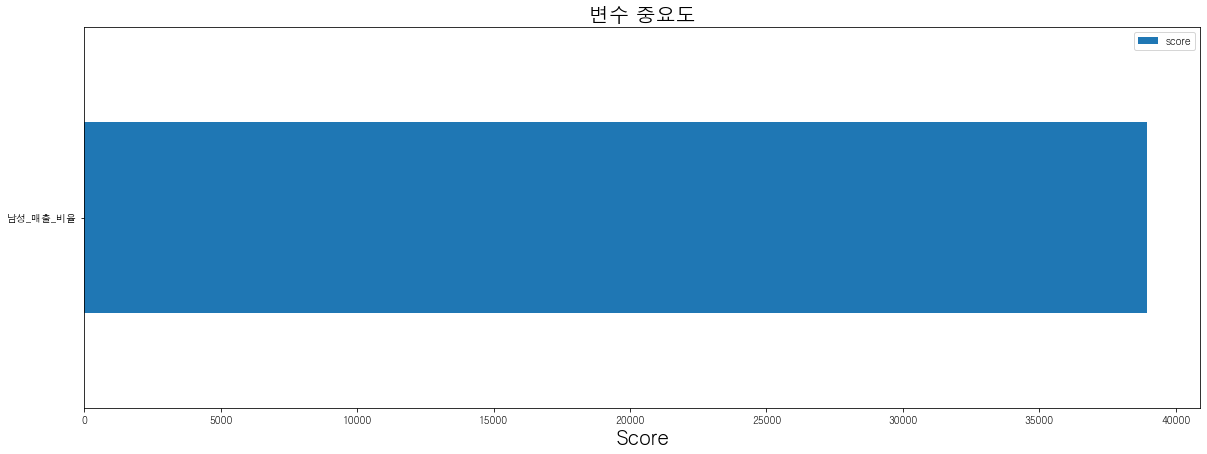

In [169]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

fig, ax = plt.pyplot.subplots(figsize=(20,7))
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh', ax = ax, label = '')
ax.set_title('변수 중요도', size = 20)
ax.set_xlabel('Score', size = 20)

## 5. 생존율 - 연령대

In [171]:
df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율',
       '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매

In [172]:
df_new = df[['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '폐업_률']]
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,폐업_률
0,2015,1,CS300011,1.00,0.92,0.50,0.20,0.25,0.29,4
1,2015,2,CS300011,0.75,0.69,0.83,0.60,0.12,0.29,2
2,2015,3,CS300011,0.75,0.77,1.00,0.40,0.25,0.00,3
3,2015,4,CS300011,1.00,0.85,0.50,0.60,0.00,0.14,2
4,2016,1,CS300011,1.00,0.77,0.50,0.40,0.12,0.43,3
5,2016,2,CS300011,0.75,0.69,0.50,0.40,0.50,0.43,1
6,2016,3,CS300011,0.75,0.85,0.17,0.00,0.25,0.71,4
7,2016,4,CS300011,0.75,0.77,0.50,0.40,0.38,0.29,2
8,2017,1,CS300011,0.75,0.62,0.50,0.20,0.38,0.71,5
9,2017,2,CS300011,0.50,0.54,0.50,0.40,0.38,0.86,3


In [173]:
# dataframe 행 순서 조정

a = df_new.iloc[20]
df_new = df_new.drop(20)
df_new = df_new.append(a)
df_new = df_new.reset_index(drop = True)
df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,폐업_률
0,2015,1,CS300011,1.00,0.92,0.50,0.20,0.25,0.29,4
1,2015,2,CS300011,0.75,0.69,0.83,0.60,0.12,0.29,2
2,2015,3,CS300011,0.75,0.77,1.00,0.40,0.25,0.00,3
3,2015,4,CS300011,1.00,0.85,0.50,0.60,0.00,0.14,2
4,2016,1,CS300011,1.00,0.77,0.50,0.40,0.12,0.43,3
5,2016,2,CS300011,0.75,0.69,0.50,0.40,0.50,0.43,1
6,2016,3,CS300011,0.75,0.85,0.17,0.00,0.25,0.71,4
7,2016,4,CS300011,0.75,0.77,0.50,0.40,0.38,0.29,2
8,2017,1,CS300011,0.75,0.62,0.50,0.20,0.38,0.71,5
9,2017,2,CS300011,0.50,0.54,0.50,0.40,0.38,0.86,3


In [174]:
y = df_new[['기준_년_코드', '기준_분기_코드', '폐업_률']]
y

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,4
1,2015,2,2
2,2015,3,3
3,2015,4,2
4,2016,1,3
5,2016,2,1
6,2016,3,4
7,2016,4,2
8,2017,1,5
9,2017,2,3


In [175]:
y = y.drop(0).reset_index(drop = True)

y_new = pd.DataFrame(columns = y.columns)

for i in range(len(y)):
    row = y.iloc[i]
    if row['기준_분기_코드'] != 1:
        row['기준_분기_코드'] -= 1
        y_new = y_new.append(row)
    else:
        row['기준_년_코드'] -= 1
        row['기준_분기_코드'] = 4
        y_new = y_new.append(row)
        
y_new

,기준_년_코드,기준_분기_코드,폐업_률
0,2015,1,2
1,2015,2,3
2,2015,3,2
3,2015,4,3
4,2016,1,1
5,2016,2,4
6,2016,3,2
7,2016,4,5
8,2017,1,3
9,2017,2,2


In [176]:
x_predict = pd.DataFrame(columns = df_new.columns)
x_predict = x_predict.append(df_new.iloc[21,:])
x_predict = x_predict.drop(['기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '폐업_률'], axis = 1)